In [1]:
import os
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [ ]:
#!ls /content/drive/MyDrive/DataSet/Kvalidation.zip
#!unzip -qq  /content/drive/MyDrive/DataSet/Kvalidation.zip 

ls: cannot access '/content/drive/MyDrive/DataSet/Kvalidation.zip': No such file or directory


In [ ]:
VALN_ROOT=Path("/content/drive/MyDrive/DataSet/KImages/data/kitti/val")

Functions 
1. def get_Images_data(root_path):
2. def draw_single_bar_graph(drive_names, files_count, label):
    

In [ ]:
def get_Images_data(root_path):
    dirs=[]
    files_count = []

    for dir in os.listdir(root_path):
      subdir=root_path/dir
      left, right = subdir/"image_02/data", subdir/"image_03/data"
      lfile_count=len([ file1 for file1 in os.listdir(left)  if file1.split('.')[-1] == 'png'])
      rfile_count=len([ file1 for file1 in os.listdir(right)  if file1.split('.')[-1] == 'png'])

      assert lfile_count == rfile_count, f" {dir} File count mismatch left {lfile_count} {rfile_count}"
      dirs.append(dir)
      files_count.append(lfile_count) 
      
    return dirs,files_count

In [ ]:
dirs, files_count = get_Images_data(VALN_ROOT)

In [ ]:
dirs, files_count, sum(files_count)

(['2011_09_26_drive_0014_sync',
  '2011_09_26_drive_0020_sync',
  '2011_09_26_drive_0079_sync',
  '2011_09_29_drive_0071_sync',
  '2011_09_30_drive_0033_sync',
  '2011_10_03_drive_0042_sync',
  '2011_09_26_drive_0002_sync'],
 [314, 86, 100, 1059, 1594, 1170, 77],
 4400)

In [ ]:
df_val = pd.DataFrame(list(zip(dirs,files_count)), columns=["Dname", "fcount"])
df_val.sort_values("fcount",inplace=True)
df_val.to_csv("validation_dirs.csv", index=False)

In [ ]:
TRAIN_ROOT = Path("/content/drive/MyDrive/DataSet/KImages/data/kitti/train")

In [ ]:
train_sample_dirs, train_sample_files_count = get_Images_data(TRAIN_ROOT)

In [ ]:
train_sample_dirs, train_sample_files_count

(['2011_09_28_drive_0002_sync',
  '2011_09_28_drive_0001_sync',
  '2011_09_29_drive_0004_sync',
  '2011_09_29_drive_0026_sync',
  '2011_09_30_drive_0016_sync',
  '2011_09_30_drive_0018_sync',
  '2011_09_30_drive_0020_sync',
  '2011_09_30_drive_0027_sync',
  '2011_09_30_drive_0028_sync',
  '2011_09_30_drive_0034_sync',
  '2011_10_03_drive_0027_sync',
  '2011_10_03_drive_0034_sync',
  '2011_10_03_drive_0047_sync',
  '2011_09_26_drive_0001_sync',
  '2011_09_26_drive_0005_sync',
  '2011_09_26_drive_0013_sync',
  '2011_09_26_drive_0011_sync',
  '2011_09_26_drive_0015_sync',
  '2011_09_26_drive_0009_sync',
  '2011_09_26_drive_0017_sync',
  '2011_09_26_drive_0018_sync',
  '2011_09_26_drive_0019_sync',
  '2011_09_26_drive_0027_sync',
  '2011_09_26_drive_0023_sync',
  '2011_09_26_drive_0029_sync',
  '2011_09_26_drive_0028_sync',
  '2011_09_26_drive_0022_sync',
  '2011_09_26_drive_0059_sync',
  '2011_09_26_drive_0060_sync',
  '2011_09_26_drive_0061_sync',
  '2011_09_26_drive_0064_sync',
  '2011_

In [ ]:
print(f"TRAINING DATA:: Directories:", len(train_sample_dirs), "Total files:", sum(train_sample_files_count))

TRAINING DATA:: Directories: 54 Total files: 37982


In [ ]:
df_train = pd.DataFrame(list(zip(train_sample_dirs, train_sample_files_count)), columns=["Dname", "fcount"])
df_train.sort_values("fcount", inplace=True)
df_train.to_csv("training_dirs.csv", index=False)

**Getting the data from the CSV files:**

In [13]:
df_train_csv = pd.DataFrame()
df_train_csv = pd.read_csv("training_dirs.csv")

In [36]:
df_val_csv = pd.DataFrame()
df_val_csv = pd.read_csv("validation_dirs.csv")

In [58]:
def draw_single_bar_graph(drive_names, files_count, label):
    width = 0.4
    
    if label == "Training":  #Since we want to display 54 drivenames
      plt.figure(figsize=(30,15))
      plt.grid(visible=True, which='major', axis='y', color='g', linewidth=3)
      plt.title("Kitti Images from the " + label + " Data", fontsize=20)
      plt.ylabel('Image count', fontsize=25)
    else:
      plt.grid(visible=True, which='major', axis='y', color='g')
      plt.title("Kitti Images from the " + label + " Data", fontsize=10)
      plt.ylabel('Image count')    
    
    #x = np.arange(len(drive_names))
    #plt.bar(x,files_count, width, label=label)
    plt.bar(drive_names,files_count, width, label=label)
    plt.xticks(rotation=30, ha="right")
    
    plt.xlabel('Drive Names')
    plt.legend()
    plt.show()

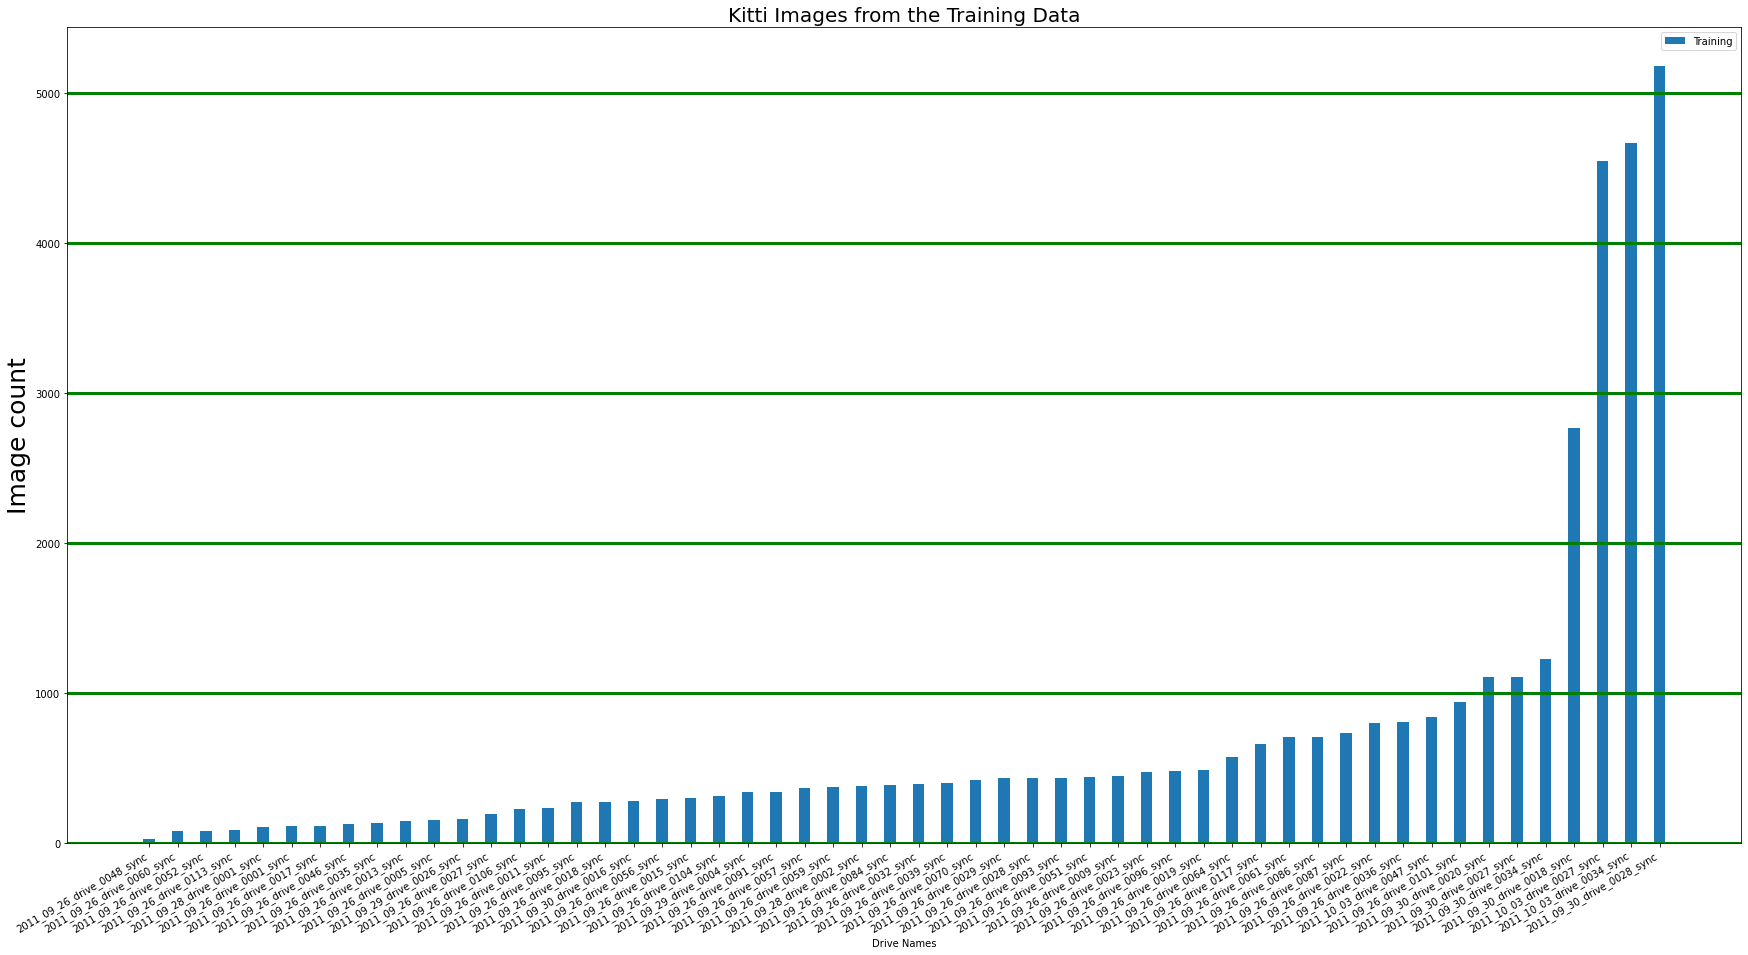

In [60]:
draw_single_bar_graph(drive_names=df_train_csv["Dname"], files_count=df_train_csv["fcount"], label="Training")

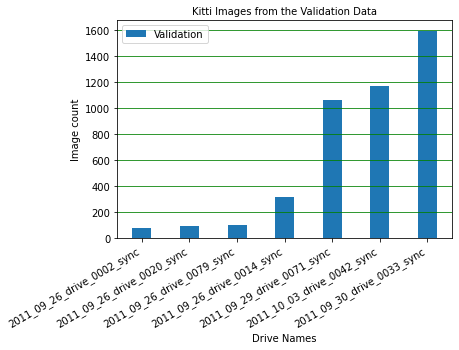

In [61]:
draw_single_bar_graph(drive_names=df_val_csv["Dname"], files_count=df_val_csv["fcount"], label="Validation")